<a href="https://colab.research.google.com/github/cuteGW/project_Lovely-G.4_none/blob/main/%EA%B0%90%EA%B7%A4_%EC%B0%A9%EA%B3%BC%EB%9F%89_1%EC%A3%BC%EC%B0%A8(%EA%B7%9C%EC%99%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # 모든 열을 출력한다.

# 기본 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import seaborn as sns
from matplotlib import rc

# 기본 한글 폰트로 설정
rc("font", family="AppleGothic")  # 맥의 경우
rc("font", family="Malgun Gothic")  # 윈도우의 경우

# 음수 부호까지 제대로 표시되도록 설정 추가
plt.rcParams['axes.unicode_minus'] = False

# 경고 메시지 무시
import random, warnings
warnings.filterwarnings("ignore")

# plolty 시각화 라이브러리
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe"

In [21]:
df_train = pd.read_csv('/content/drive/MyDrive/감귤/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/감귤/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/감귤/sample_submission.csv')

# **데이터 리뷰**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Columns: 184 entries, ID to 2022-11-28 엽록소
dtypes: float64(182), int64(1), object(1)
memory usage: 3.1+ MB


In [ ]:
df_train

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,2022-09-11 새순,2022-09-12 새순,2022-09-13 새순,2022-09-14 새순,2022-09-15 새순,2022-09-16 새순,2022-09-17 새순,2022-09-18 새순,2022-09-19 새순,2022-09-20 새순,2022-09-21 새순,2022-09-22 새순,2022-09-23 새순,2022-09-24 새순,2022-09-25 새순,2022-09-26 새순,2022-09-27 새순,2022-09-28 새순,2022-09-29 새순,2022-09-30 새순,2022-10-01 새순,2022-10-02 새순,2022-10-03 새순,2022-10-04 새순,2022-10-05 새순,2022-10-06 새순,2022-10-07 새순,2022-10-08 새순,2022-10-09 새순,2022-10-10 새순,2022-10-11 새순,2022-10-12 새순,2022-10-13 새순,2022-10-14 새순,2022-10-15 새순,2022-10-16 새순,2022-10-17 새순,2022-10-18 새순,2022-10-19 새순,2022-10-20 새순,2022-10-21 새순,2022-10-22 새순,2022-10-23 새순,2022-10-24 새순,2022-10-25 새순,2022-10-26 새순,2022-10-27 새순,2022-10-28 새순,2022-10-29 새순,2022-10-30 새순,2022-10-31 새순,2022-11-01 새순,2022-11-02 새순,2022-11-03 새순,2022-11-04 새순,2022-11-05 새순,2022-11-06 새순,2022-11-07 새순,2022-11-08 새순,2022-11-09 새순,2022-11-10 새순,2022-11-11 새순,2022-11-12 새순,2022-11-13 새순,2022-11-14 새순,2022-11-15 새순,2022-11-16 새순,2022-11-17 새순,2022-11-18 새순,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순,2022-09-01 엽록소,2022-09-02 엽록소,2022-09-03 엽록소,2022-09-04 엽록소,2022-09-05 엽록소,2022-09-06 엽록소,2022-09-07 엽록소,2022-09-08 엽록소,2022-09-09 엽록소,2022-09-10 엽록소,2022-09-11 엽록소,2022-09-12 엽록소,2022-09-13 엽록소,2022-09-14 엽록소,2022-09-15 엽록소,2022-09-16 엽록소,2022-09-17 엽록소,2022-09-18 엽록소,2022-09-19 엽록소,2022-09-20 엽록소,2022-09-21 엽록소,2022-09-22 엽록소,2022-09-23 엽록소,2022-09-24 엽록소,2022-09-25 엽록소,2022-09-26 엽록소,2022-09-27 엽록소,2022-09-28 엽록소,2022-09-29 엽록소,2022-09-30 엽록소,2022-10-01 엽록소,2022-10-02 엽록소,2022-10-03 엽록소,2022-10-04 엽록소,2022-10-05 엽록소,2022-10-06 엽록소,2022-10-07 엽록소,2022-10-08 엽록소,2022-10-09 엽록소,2022-10-10 엽록소,2022-10-11 엽록소,2022-10-12 엽록소,2022-10-13 엽록소,2022-10-14 엽록소,2022-10-15 엽록소,2022-10-16 엽록소,2022-10-17 엽록소,2022-10-18 엽록소,2022-10-19 엽록소,2022-10-20 엽록소,2022-10-21 엽록소,2022-10-22 엽록소,2022-10-23 엽록소,2022-10-24 엽록소,2022-10-25 엽록소,2022-10-26 엽록소,2022-10-27 엽록소,2022-10-28 엽록소,2022-10-29 엽록소,2022-10-30 엽록소,2022-10-31 엽록소,2022-11-01 엽록소,2022-11-02 엽록소,2022-11-03 엽록소,2022-11-04 엽록소,2022-11-05 엽록소,2022-11-06 엽록소,2022-11-07 엽록소,2022-11-08 엽록소,2022-11-09 엽록소,2022-11-10 엽록소,2022-11-11 엽록소,2022-11-12 엽록소,2022-11-13 엽록소,2022-11-14 엽록소,2022-11-15 엽록소,2022-11-16 엽록소,2022-11-17 엽록소,2022-11-18 엽록소,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,2.7,2.7,2.6,2.6,2.6,2.6,2.5,2.5,2.5,2.5,2.4,2.4,2.4,2.4,2.3,2.3,2.3,2.3,2.2,2.2,2.2,2.2,2.1,2.1,2.1,2.1,2.0,2.0,2.0,2.0,1.9,1.9,1.9,1.9,1.8,1.8,1.8,1.8,1.7,1.7,1.7,1.7,1.6,1.6,1.6,1.6,1.5,1.5,1.5,1.5,1.4,1.4,1.4,1.4,1.3,1.3,1.3,1.2,1.2,1.2,1.2,1.2,1.1,1.1,1.1,1.1,1.0,1.0,1.0,1.0,1.0,0.9,0.9,0.9,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.7,0.6,78.336504,78.243462,78.166501,78.127526,78.058021,77.915689,77.861660,77.746645,77.592138,77.572477,77.382045,77.211789,77.151051,77.063069,76.905981,76.868475,76.732897,76.669280,76.662585,76.519409,76.349661,76.186091,76.040207,75.999415,75.990592,75.953731,75.829564,75.798673,75.621243,75.427005,75.266187,75.226094,75.162319,75.079444,75.013855,74.935697,74.842749,74.836657,74.816928,74.788574,74.690358,74.504942,74.394908,74.351704,74.166346,74.020254,73.835142,73.766164,73.755269,73.627395,73.465457,73.395076,73.311405,73.243028,73.087409,73.081651,73.023755,72.987263,72.977606,72.838462,72.645386,72.512869,72.445908,72.370097,72.301180,72.228374,72.207746,72.068354,71.987663,71.869466,71.852923,71.690854,71.576402,71.384018,71.301893,71.234817,71.076903,70.996113,70.985843,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,3.2,3.1,3.1,3.1,3.0,3.0,3.0,2.

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Columns: 183 entries, ID to 2022-11-28 엽록소
dtypes: float64(182), object(1)
memory usage: 3.9+ MB


In [ ]:
df_test

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,2022-09-11 새순,2022-09-12 새순,2022-09-13 새순,2022-09-14 새순,2022-09-15 새순,2022-09-16 새순,2022-09-17 새순,2022-09-18 새순,2022-09-19 새순,2022-09-20 새순,2022-09-21 새순,2022-09-22 새순,2022-09-23 새순,2022-09-24 새순,2022-09-25 새순,2022-09-26 새순,2022-09-27 새순,2022-09-28 새순,2022-09-29 새순,2022-09-30 새순,2022-10-01 새순,2022-10-02 새순,2022-10-03 새순,2022-10-04 새순,2022-10-05 새순,2022-10-06 새순,2022-10-07 새순,2022-10-08 새순,2022-10-09 새순,2022-10-10 새순,2022-10-11 새순,2022-10-12 새순,2022-10-13 새순,2022-10-14 새순,2022-10-15 새순,2022-10-16 새순,2022-10-17 새순,2022-10-18 새순,2022-10-19 새순,2022-10-20 새순,2022-10-21 새순,2022-10-22 새순,2022-10-23 새순,2022-10-24 새순,2022-10-25 새순,2022-10-26 새순,2022-10-27 새순,2022-10-28 새순,2022-10-29 새순,2022-10-30 새순,2022-10-31 새순,2022-11-01 새순,2022-11-02 새순,2022-11-03 새순,2022-11-04 새순,2022-11-05 새순,2022-11-06 새순,2022-11-07 새순,2022-11-08 새순,2022-11-09 새순,2022-11-10 새순,2022-11-11 새순,2022-11-12 새순,2022-11-13 새순,2022-11-14 새순,2022-11-15 새순,2022-11-16 새순,2022-11-17 새순,2022-11-18 새순,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순,2022-09-01 엽록소,2022-09-02 엽록소,2022-09-03 엽록소,2022-09-04 엽록소,2022-09-05 엽록소,2022-09-06 엽록소,2022-09-07 엽록소,2022-09-08 엽록소,2022-09-09 엽록소,2022-09-10 엽록소,2022-09-11 엽록소,2022-09-12 엽록소,2022-09-13 엽록소,2022-09-14 엽록소,2022-09-15 엽록소,2022-09-16 엽록소,2022-09-17 엽록소,2022-09-18 엽록소,2022-09-19 엽록소,2022-09-20 엽록소,2022-09-21 엽록소,2022-09-22 엽록소,2022-09-23 엽록소,2022-09-24 엽록소,2022-09-25 엽록소,2022-09-26 엽록소,2022-09-27 엽록소,2022-09-28 엽록소,2022-09-29 엽록소,2022-09-30 엽록소,2022-10-01 엽록소,2022-10-02 엽록소,2022-10-03 엽록소,2022-10-04 엽록소,2022-10-05 엽록소,2022-10-06 엽록소,2022-10-07 엽록소,2022-10-08 엽록소,2022-10-09 엽록소,2022-10-10 엽록소,2022-10-11 엽록소,2022-10-12 엽록소,2022-10-13 엽록소,2022-10-14 엽록소,2022-10-15 엽록소,2022-10-16 엽록소,2022-10-17 엽록소,2022-10-18 엽록소,2022-10-19 엽록소,2022-10-20 엽록소,2022-10-21 엽록소,2022-10-22 엽록소,2022-10-23 엽록소,2022-10-24 엽록소,2022-10-25 엽록소,2022-10-26 엽록소,2022-10-27 엽록소,2022-10-28 엽록소,2022-10-29 엽록소,2022-10-30 엽록소,2022-10-31 엽록소,2022-11-01 엽록소,2022-11-02 엽록소,2022-11-03 엽록소,2022-11-04 엽록소,2022-11-05 엽록소,2022-11-06 엽록소,2022-11-07 엽록소,2022-11-08 엽록소,2022-11-09 엽록소,2022-11-10 엽록소,2022-11-11 엽록소,2022-11-12 엽록소,2022-11-13 엽록소,2022-11-14 엽록소,2022-11-15 엽록소,2022-11-16 엽록소,2022-11-17 엽록소,2022-11-18 엽록소,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,4.1,4.0,4.0,3.9,3.9,3.8,3.8,3.7,3.7,3.6,3.6,3.5,3.5,3.5,3.4,3.4,3.3,3.3,3.2,3.2,3.1,3.1,3.1,3.0,3.0,2.9,2.9,2.8,2.8,2.8,2.7,2.7,2.6,2.6,2.5,2.5,2.5,2.4,2.4,2.3,2.3,2.3,2.2,2.2,2.1,2.1,2.0,2.0,2.0,1.9,1.9,1.8,1.8,1.7,1.7,1.7,1.6,1.6,1.5,1.5,1.4,1.4,1.4,1.3,1.3,1.2,1.2,1.1,1.1,1.0,1.0,1.0,0.9,0.9,0.8,0.8,0.7,0.7,0.6,0.6,0.6,0.5,0.0,0.0,80.299924,80.164425,80.113400,80.045268,79.909461,79.860315,79.811869,79.624316,79.614266,79.456707,79.436946,79.278287,79.207350,79.065891,78.983307,78.949857,78.800969,78.620680,78.426011,78.366402,78.214421,78.176183,78.165639,78.068102,77.946019,77.892998,77.870922,77.785632,77.632819,77.562211,77.556393,77.491610,77.462227,77.347296,77.282410,77.193844,77.051414,76.909094,76.854623,76.793634,76.660647,76.464527,76.310109,76.144155,76.033916,75.949211,75.873663,75.749145,75.579353,75.529159,75.386039,75.229657,75.065886,74.868571,74.757658,74.671614,74.521238,74.416054,74.297343,74.108026,74.020540,73.923707,73.903627,73.801957,73.730936,73.646378,73.563641,73.437864,73.248723,73.187633,73.183802,73.079103,72.983074,72.910430,72.729935,72.728706,72.654241,72.473842,72.286599,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,2.4,2.4,2.4,2.4,2.4,2.3,2.3,2.3,2.3,2.2,2.2,2

In [ ]:
df_train.isnull().sum()

ID                0
착과량(int)          0
수고(m)             0
수관폭1(min)         0
수관폭2(max)         0
                 ..
2022-11-24 엽록소    0
2022-11-25 엽록소    0
2022-11-26 엽록소    0
2022-11-27 엽록소    0
2022-11-28 엽록소    0
Length: 184, dtype: int64

In [ ]:
df_test.isnull().sum()

ID                0
수고(m)             0
수관폭1(min)         0
수관폭2(max)         0
수관폭평균             0
                 ..
2022-11-24 엽록소    2
2022-11-25 엽록소    2
2022-11-26 엽록소    2
2022-11-27 엽록소    2
2022-11-28 엽록소    2
Length: 183, dtype: int64

# **EDA**

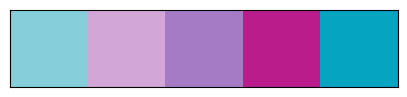

In [ ]:
# Color Palette

custom_colors = ["#85CEDA","#D2A7D8", "#A67BC5", "#BB1C8B", "#05A4C0"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

# Set size

sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

<Axes: xlabel='착과량(int)', ylabel='Count'>

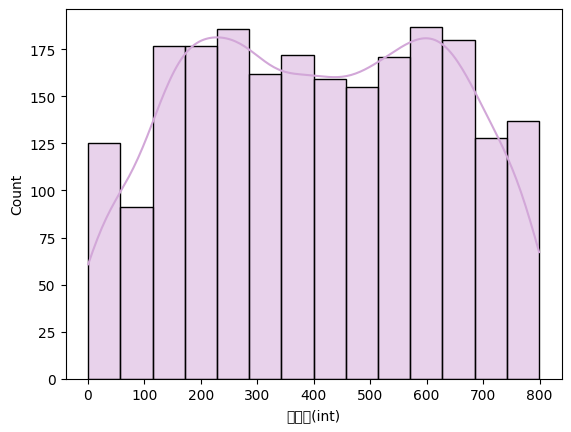

In [ ]:
sns.histplot(df_train['착과량(int)'],kde=True,color="#D2A7D8")

<Axes: xlabel='수고(m)', ylabel='Count'>

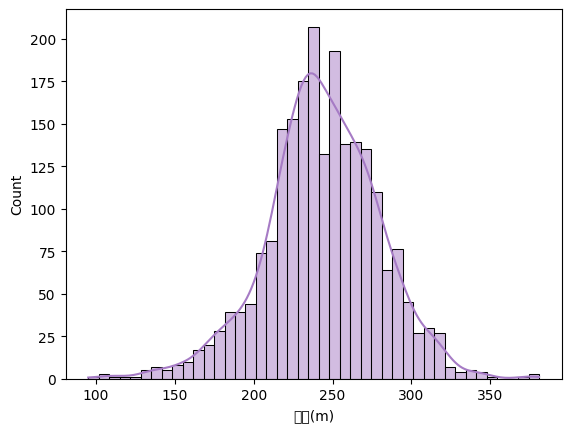

In [ ]:
sns.histplot(df_train['수고(m)'],kde=True,color="#A67BC5")

<Axes: xlabel='수관폭1(min)', ylabel='Count'>

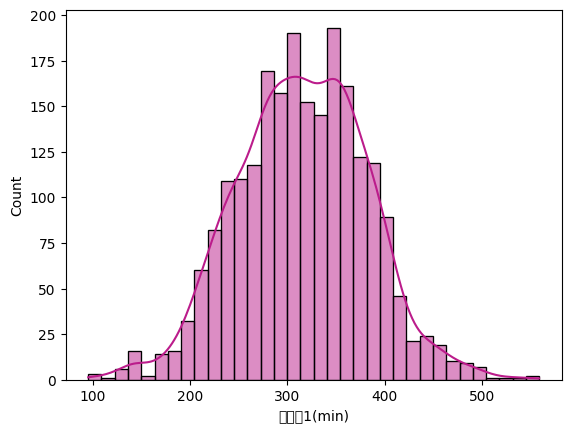

In [ ]:
sns.histplot(df_train['수관폭1(min)'],kde=True,color="#BB1C8B")

<Axes: xlabel='수관폭2(max)', ylabel='Count'>

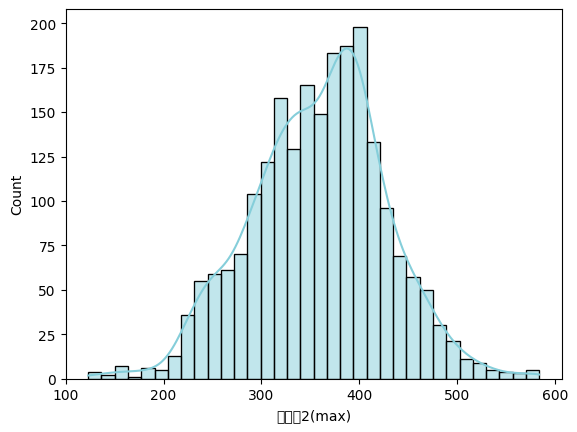

In [ ]:
sns.histplot(df_train['수관폭2(max)'],kde=True,color="#85CEDA")

<Axes: xlabel='수관폭평균', ylabel='Count'>

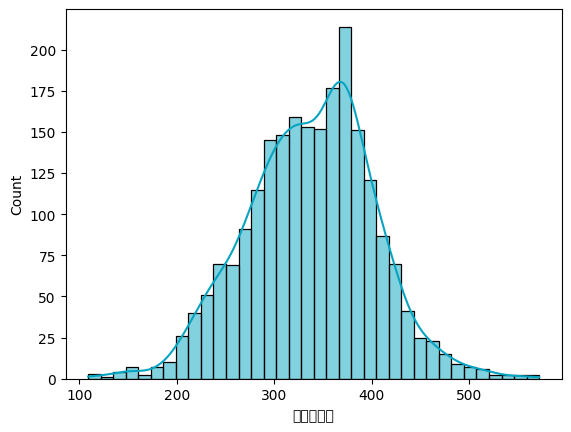

In [ ]:
sns.histplot(df_train['수관폭평균'],kde=True,color="#05A4C0")

In [46]:
df = df_train.copy()
df['새순mean'] = df.iloc[:,6:95].mean(axis=1)

<Axes: xlabel='새순mean', ylabel='Count'>

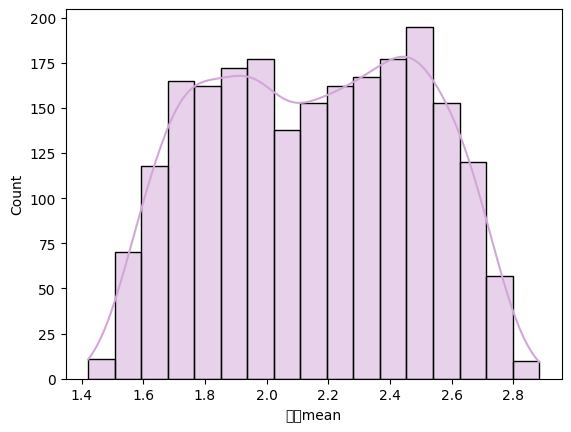

In [47]:
sns.histplot(df['새순mean'],kde=True,color="#D2A7D8")

In [42]:
df = df_train.copy()
df['엽록소mean'] =  df.iloc[:,95:184].mean(axis=1)

<Axes: xlabel='엽록소mean', ylabel='Count'>

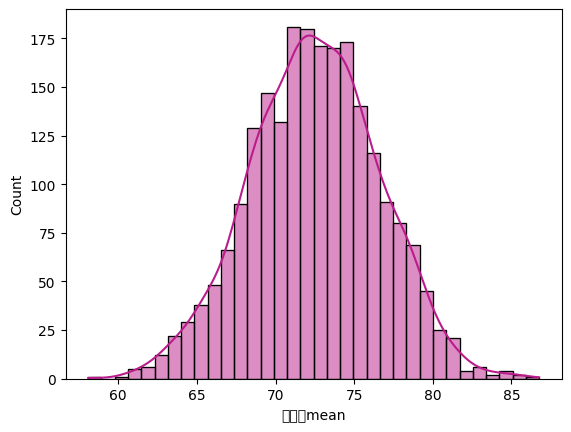

In [44]:
sns.histplot(df['엽록소mean'],kde=True,color="#BB1C8B")